In [1]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.decomposition import NMF,PCA
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
DATAPATH = "data/digits.csv"
image_shape=(28,28)

In [2]:
df = pd.read_csv(DATAPATH)
#df_s = df.sort_values('label')
y = df["label"].values
labels = df["label"] 
X = df.drop("label",axis=1).values/255
org_X = df.drop("label",axis=1)
#print(df.head())
#print(df.shape)
#print(y)
#print(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [3]:
pca = PCA(n_components=15,random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
clf = svm.SVC(parameters)


clf = GridSearchCV(clf, parameters, verbose=2,n_jobs=-1)
clf.fit(X_train_pca,y_train)
test_score = clf.score(X_test_pca,y_test)
y_pred_pca = clf.predict(X_test_pca)
print(test_score)
print(metrics.classification_report(y_test, y_pred_pca, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred_pca, labels=range(10)))

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:  5.9min finished


0.9485
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       200
          1       0.99      0.98      0.98       225
          2       0.93      0.96      0.94       217
          3       0.92      0.90      0.91       180
          4       0.95      0.94      0.95       187
          5       0.90      0.95      0.93       169
          6       0.95      0.97      0.96       215
          7       0.95      0.95      0.95       200
          8       0.96      0.94      0.95       202
          9       0.96      0.90      0.93       205

avg / total       0.95      0.95      0.95      2000

[[195   0   0   1   1   1   2   0   0   0]
 [  0 221   1   0   1   1   0   1   0   0]
 [  0   1 208   2   1   2   2   1   0   0]
 [  1   1   4 162   0   7   2   0   3   0]
 [  0   0   1   1 176   0   2   0   1   6]
 [  1   0   0   2   1 161   2   0   2   0]
 [  3   0   1   1   0   1 208   0   1   0]
 [  1   0   3   1   2   0   1 191   0   1]
 [  0   1 

In [4]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.999970571156304
0.999972025872032
0.9999733017254738
0.9999747102713376
0.9999760211311046
0.9999772695522479
0.9999784955438097
0.9999796706778437
0.9999808191085956
0.999981914876205
0.9999830461604596
0.9999841166243209
0.9999851245090426
0.9999860551475193
0.999986972642118
0.9999877785346286
0.9999885807686472
0.9999893061721709
0.9999900326271514
0.9999907023336531
0.9999913543581559
0.9999919874744156
0.999992610407147
0.9999931827366145
0.9999937068752357
0.9999942205952259
0.9999947011946627
0.9999951499917773
0.9999955944221135
0.9999960329524944
0.9999963653760576
0.9999966707727973
0.9999969645353939
0.9999972479546465
0.9999975073503414
0.9999977634990354
0.9999979823202636
0.9999981974477052
0.9999983914118401
0.9999985638727104
0.9999987214406412
0.9999988462357214
0.9999989702494481
0.9999990936909516
0.9999992151282016
0.9999993308037965
0.999999429232105
0.9999995258797942
0.9999996111403068
0.9999996902845143
0.999999757836624
0.9999998212673907
0.9999998839281828


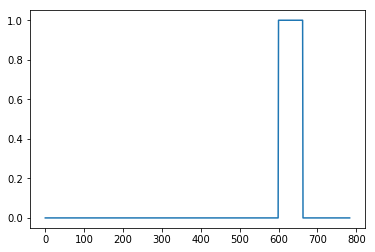

In [5]:
E_list = np.zeros(784)
cumsum_explained = np.zeros(784)
for i in range(600,784):
    pca = PCA(n_components = i)  # 主成分分析オブジェクトの作成
    pca.fit(X_train)                       # 主成分分析の実行
    transformed = pca.transform(X_train)   # データに対して削減後のベクトルを生成
    E = pca.explained_variance_ratio_        # 寄与率
    cumsum_explained[i] = np.cumsum(E)[::-1][0]
    if cumsum_explained[i] == cumsum_explained[i-1]:
        print(i)
        break
    print(cumsum_explained[i])
plt.plot(cumsum_explained)
plt.show()

In [6]:
pca = PCA(n_components = 784,random_state=0)  # 主成分分析オブジェクトの作成
pca.fit(X_train)  # 主成分分析の実行
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
parameter = [{"C":[1000],"kernel":["rbf"],"gamma":[0.001]}]
clf = svm.SVC(C=1000,kernel="rbf",gamma=0.001)
clf.fit(X_train_pca,y_train)
test_score = clf.score(X_test_pca,y_test)
y_pred_pca = clf.predict(X_test_pca)
print(test_score)
print(metrics.classification_report(y_test, y_pred_pca, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred_pca, labels=range(10)))

0.9345
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       200
          1       0.96      0.99      0.97       225
          2       0.91      0.94      0.92       217
          3       0.90      0.88      0.89       180
          4       0.94      0.96      0.95       187
          5       0.90      0.89      0.89       169
          6       0.95      0.95      0.95       215
          7       0.94      0.94      0.94       200
          8       0.95      0.88      0.91       202
          9       0.93      0.91      0.92       205

avg / total       0.93      0.93      0.93      2000

[[198   0   0   0   0   0   1   0   1   0]
 [  0 222   1   0   1   0   0   0   1   0]
 [  2   2 203   3   2   1   1   1   1   1]
 [  0   1   6 159   0   8   1   0   4   1]
 [  0   0   1   0 180   0   3   0   0   3]
 [  1   1   0   8   0 150   3   0   2   4]
 [  7   0   1   0   1   2 204   0   0   0]
 [  0   2   3   0   2   0   1 189   0   3]
 [  0   3 

In [7]:
pca_small = PCA(n_components = 662,random_state=0)  # 主成分分析オブジェクトの作成
pca_small.fit(X_train)  # 主成分分析の実行
X_train_pca = pca_small.transform(X_train)
X_test_pca = pca_small.transform(X_test)
parameter = [{"C":[1000],"kernel":["rbf"],"gamma":[0.001]}]
clf = svm.SVC(C=1000,kernel="rbf",gamma=0.001)
clf.fit(X_train_pca,y_train)
test_score = clf.score(X_test_pca,y_test)
y_pred_pca = clf.predict(X_test_pca)
print(test_score)
print(metrics.classification_report(y_test, y_pred_pca, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred_pca, labels=range(10)))

0.9345
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       200
          1       0.96      0.99      0.97       225
          2       0.91      0.94      0.92       217
          3       0.90      0.88      0.89       180
          4       0.94      0.96      0.95       187
          5       0.90      0.89      0.89       169
          6       0.95      0.95      0.95       215
          7       0.94      0.94      0.94       200
          8       0.95      0.88      0.91       202
          9       0.93      0.91      0.92       205

avg / total       0.93      0.93      0.93      2000

[[198   0   0   0   0   0   1   0   1   0]
 [  0 222   1   0   1   0   0   0   1   0]
 [  2   2 203   3   2   1   1   1   1   1]
 [  0   1   6 159   0   8   1   0   4   1]
 [  0   0   1   0 180   0   3   0   0   3]
 [  1   1   0   8   0 150   3   0   2   4]
 [  7   0   1   0   1   2 204   0   0   0]
 [  0   2   3   0   2   0   1 189   0   3]
 [  0   3 

In [8]:
svc_normal = svm.SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.001, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svc_normal.fit(X_train,y_train)
test_score = svc_normal.score(X_test,y_test)
y_pred = svc_normal.predict(X_test)
print(test_score)
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred, labels=range(10)))

0.962
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       200
          1       0.98      0.99      0.98       225
          2       0.95      0.95      0.95       217
          3       0.94      0.93      0.94       180
          4       0.96      0.98      0.97       187
          5       0.93      0.95      0.94       169
          6       0.97      0.97      0.97       215
          7       0.97      0.97      0.97       200
          8       0.97      0.92      0.95       202
          9       0.97      0.96      0.97       205

avg / total       0.96      0.96      0.96      2000

[[198   0   0   0   0   0   1   0   1   0]
 [  0 222   1   0   1   0   0   0   1   0]
 [  3   2 206   2   1   0   2   0   0   1]
 [  0   0   5 167   0   5   1   0   2   0]
 [  0   0   0   0 184   0   1   0   0   2]
 [  0   1   0   4   1 160   2   0   1   0]
 [  4   0   0   0   0   2 209   0   0   0]
 [  0   0   1   0   2   0   0 195   0   2]
 [  1   1  

In [32]:
from mpl_toolkits.mplot3d import Axes3D
tsne = TSNE(random_state=42)
mnist_tsne = tsne.fit_transform(X_test)

Text(0,0.5,'t-SNE feature 1')

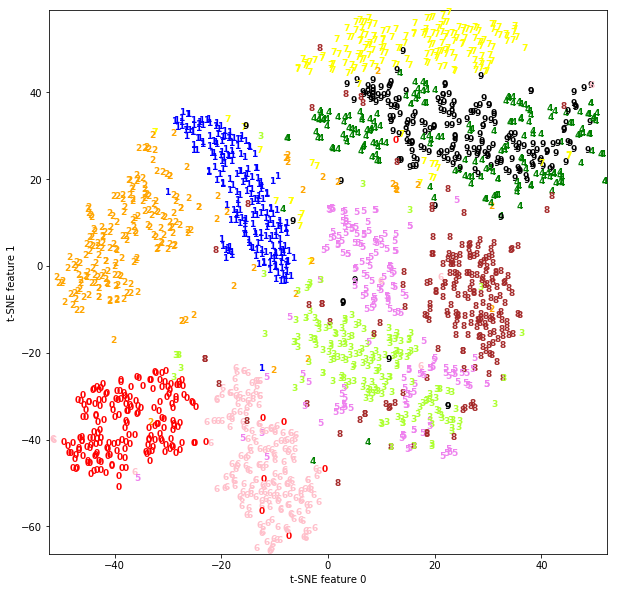

In [34]:
colors = ["red","blue","orange","greenyellow","green",
          "violet", "pink","yellow","brown","black"]
plt.figure(figsize=(10,10))
plt.xlim(mnist_tsne[:,0].min(),mnist_tsne[:,0].max() + 1)
plt.ylim(mnist_tsne[:,1].min(),mnist_tsne[:,1].max() + 1)
for i in range(len(X_test)):
    plt.text(mnist_tsne[i,0],mnist_tsne[i,1],str(y_test[i]),
            color=colors[int(y_test[i])],
            fontdict={"weight":"bold","size":9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")